### 모양을 변환시켜주는 것들
- reshape
- broadcasting : 자동적으로 모양 변환// 그렇지만 복잡하면 안바뀐다

In [1]:
import numpy as np

### 정보 제공
- lookfor
- info

In [3]:
np.lookfor('shape')

Search results for 'shape'
--------------------------
numpy.shape
    Return the shape of an array.
numpy.reshape
    Gives a new shape to an array without changing its data.
numpy.flip
    Reverse the order of elements in an array along the given axis.
numpy.full
    Return a new array of given shape and type, filled with `fill_value`.
numpy.isin
    Calculates `element in test_elements`, broadcasting over `element` only.
numpy.ones
    Return a new array of given shape and type, filled with ones.
numpy.empty
    Return a new array of given shape and type, without initializing entries.
numpy.zeros
    Return a new array of given shape and type, filled with zeros.
numpy.resize
    Return a new array with the specified shape.
numpy.ndarray
    ndarray(shape, dtype=float, buffer=None, offset=0,
numpy.ndindex
    An N-dimensional iterator object to index arrays.
numpy.squeeze
    Remove single-dimensional entries from the shape of an array.
numpy.ma.shape
    Return the shape of an array.

In [4]:
np.lookfor('create array')

Search results for 'create array'
---------------------------------
numpy.array
    Create an array.
numpy.memmap
    Create a memory-map to an array stored in a *binary* file on disk.
numpy.diagflat
    Create a two-dimensional array with the flattened input as a diagonal.
numpy.fromiter
    Create a new 1-dimensional array from an iterable object.
numpy.partition
    Return a partitioned copy of an array.
numpy.ctypeslib.as_array
    Create a numpy array from a ctypes array or POINTER.
numpy.ma.diagflat
    Create a two-dimensional array with the flattened input as a diagonal.
numpy.ma.make_mask
    Create a boolean mask from an array.
numpy.ctypeslib.as_ctypes
    Create and return a ctypes object from a numpy array.  Actually
numpy.asarray
    Convert the input to an array.
numpy.ndarray
    ndarray(shape, dtype=float, buffer=None, offset=0,
numpy.recarray
    Construct an ndarray that allows field access using attributes.
numpy.chararray
    chararray(shape, itemsize=1, unicode=Fa

In [5]:
a = np.array(100)

In [7]:
a # 0차. 스칼라

array(100)

In [8]:
a = np.array([100]) # 1차

In [9]:
a = np.array([[1,2,3],[4,5,6]]) #2차

### 여러 개의 값을 하나로 -> reduction

In [10]:
a

array([[1, 2, 3],
       [4, 5, 6]])

**행 열로 합이 한 번에 되는 이유는 stride 개념이 숨어있기 때문**

## [reshape]

In [37]:
a = np.arange(27)

In [12]:
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26])

In [14]:
a.shape # tuple로 표현했기 때문에 뒤에 콤마가 온다

(27,)

In [15]:
a.reshape(3, 9) # 모양 바꿔준다

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8],
       [ 9, 10, 11, 12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23, 24, 25, 26]])

**mutable function이 아니라 자신은 안 바뀐다**

In [16]:
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26])

**변화시키려면 재할당해야**

In [17]:
b = a.reshape(3,9)

In [19]:
b[0][0] = 100

In [20]:
a

array([100,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26])

**reshape한 애가 바뀌어버림. 그래서 실수 안하기 위해 deep copy를 써야 한다**

In [21]:
b = a.reshape(3,9).copy()

In [22]:
b = a.reshape(3,-1) # -1은 자동이라는 뜻. 여기에서는 9로 바뀐다

In [24]:
b

array([[100,   1,   2,   3,   4,   5,   6,   7,   8],
       [  9,  10,  11,  12,  13,  14,  15,  16,  17],
       [ 18,  19,  20,  21,  22,  23,  24,  25,  26]])

In [25]:
b = a.reshape(-1, 9)

In [26]:
b

array([[100,   1,   2,   3,   4,   5,   6,   7,   8],
       [  9,  10,  11,  12,  13,  14,  15,  16,  17],
       [ 18,  19,  20,  21,  22,  23,  24,  25,  26]])

In [27]:
b = a.reshape(-1,-1)

ValueError: can only specify one unknown dimension

In [28]:
# 2개 동시에 유추할수는 없다

In [31]:
b = a.reshape(3, -100) # 관례상 -1일 뿐, -가 붙으면 자동적으로 바꿔준다

In [32]:
b

array([[100,   1,   2,   3,   4,   5,   6,   7,   8],
       [  9,  10,  11,  12,  13,  14,  15,  16,  17],
       [ 18,  19,  20,  21,  22,  23,  24,  25,  26]])

In [33]:
a.resize((3,9))

In [35]:
a # resize는 mutable function. 재할당 안해도 바뀐다

array([[100,   1,   2,   3,   4,   5,   6,   7,   8],
       [  9,  10,  11,  12,  13,  14,  15,  16,  17],
       [ 18,  19,  20,  21,  22,  23,  24,  25,  26]])

In [38]:
a.resize((3,5))

In [40]:
a # resize하면 알아서 잘라서 계산해서 해준다

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [42]:
a.resize((3,10))

In [43]:
a

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26,  0,  0,  0]])

In [48]:
a.resize((-1,10)) # -1은 안된다

ValueError: negative dimensions not allowed

In [49]:
# mutable 헷갈려서 잘 안쓴다
## 거의 reshape가 주로 나온다

## [split]

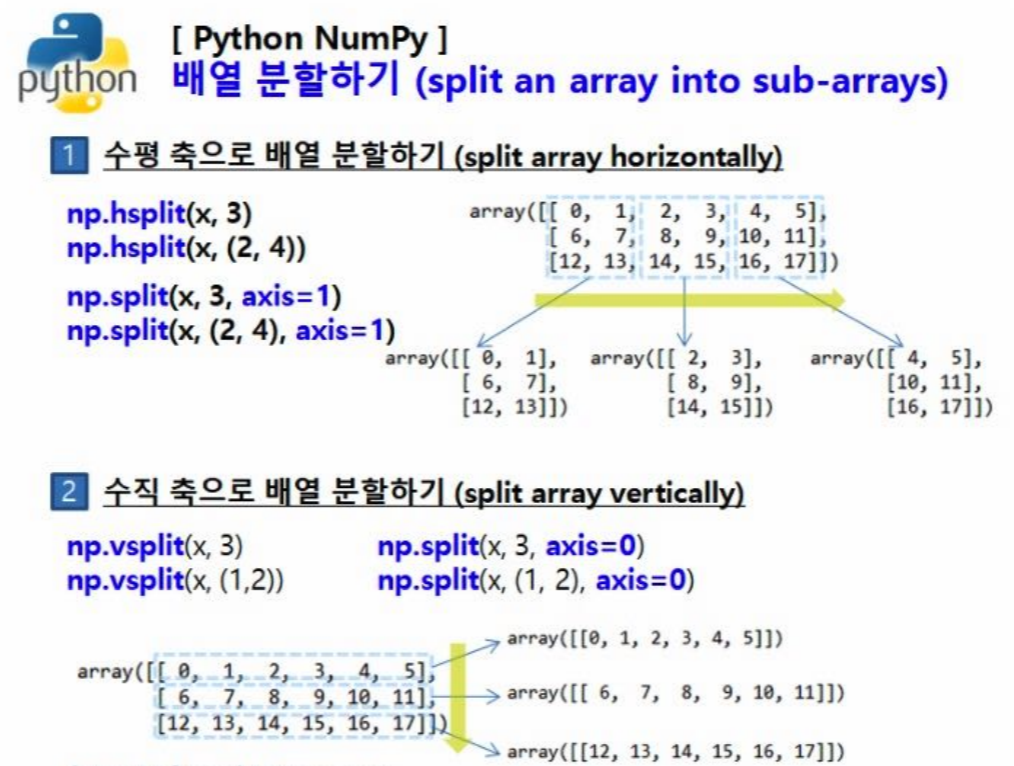

In [51]:
a = np.arange(27)
a = a.reshape(3,9)

In [52]:
a

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8],
       [ 9, 10, 11, 12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23, 24, 25, 26]])

In [53]:
dir(a)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__

In [55]:
'split' in dir(a) # function 방식에 없다 -> 메소드 방식

False

In [57]:
np.split(a,2)

ValueError: array split does not result in an equal division

In [58]:
np.split(a, (1,2))

[array([[0, 1, 2, 3, 4, 5, 6, 7, 8]]),
 array([[ 9, 10, 11, 12, 13, 14, 15, 16, 17]]),
 array([[18, 19, 20, 21, 22, 23, 24, 25, 26]])]

In [59]:
# (1,2) -> 0에서 1까지, 1에서 2까지, 2에서 3까지 해서 총 3개

In [60]:
np.split(a, (2,2))

[array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8],
        [ 9, 10, 11, 12, 13, 14, 15, 16, 17]]),
 array([], shape=(0, 9), dtype=int32),
 array([[18, 19, 20, 21, 22, 23, 24, 25, 26]])]

In [62]:
# (2,2) -> 2 이전, 2에서 2까지(비어 있다), 2에서 끝까지

In [63]:
np.split(a, (2,5))

[array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8],
        [ 9, 10, 11, 12, 13, 14, 15, 16, 17]]),
 array([[18, 19, 20, 21, 22, 23, 24, 25, 26]]),
 array([], shape=(0, 9), dtype=int32)]

In [64]:
np.split(a, (-2, 5))

[array([[0, 1, 2, 3, 4, 5, 6, 7, 8]]),
 array([[ 9, 10, 11, 12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23, 24, 25, 26]]),
 array([], shape=(0, 9), dtype=int32)]

In [65]:
# -2 까지 했는데 0 까지 잘렸다 -> 0이 기준이다!

In [67]:
np.split(a, (5, 5), axis = 1)

[array([[ 0,  1,  2,  3,  4],
        [ 9, 10, 11, 12, 13],
        [18, 19, 20, 21, 22]]),
 array([], shape=(3, 0), dtype=int32),
 array([[ 5,  6,  7,  8],
        [14, 15, 16, 17],
        [23, 24, 25, 26]])]

In [68]:
# 위와 같은게 hsplit

In [69]:
np.hsplit(a,5)

ValueError: array split does not result in an equal division

In [70]:
np.hsplit(a, (5,))

[array([[ 0,  1,  2,  3,  4],
        [ 9, 10, 11, 12, 13],
        [18, 19, 20, 21, 22]]), array([[ 5,  6,  7,  8],
        [14, 15, 16, 17],
        [23, 24, 25, 26]])]

In [71]:
np.vsplit(a,(5,))

[array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8],
        [ 9, 10, 11, 12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23, 24, 25, 26]]),
 array([], shape=(0, 9), dtype=int32)]

 ## [stack]

In [72]:
b = np.arange(5)
c = np.arange(5,10)

In [74]:
c

array([5, 6, 7, 8, 9])

In [75]:
np.stack((b,c)) #기본적으로 axis 0

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [76]:
np.stack((b,c), axis = 1)

array([[0, 5],
       [1, 6],
       [2, 7],
       [3, 8],
       [4, 9]])

In [77]:
np.hstack((b,c))

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [78]:
np.vstack((b,c))

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [79]:
# 단축 표현이 있다

In [80]:
np.r_[b,c]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [81]:
# matlab 함수

In [82]:
np.r_[b,c] # row

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [84]:
np.c_[b,c] # column

array([[0, 5],
       [1, 6],
       [2, 7],
       [3, 8],
       [4, 9]])

In [90]:
[10, 3, 2, 6,5,][slice(1,5)]

[3, 2, 6, 5]

In [88]:
np.s_[1,3]

(1, 3)

In [89]:
np.arange(10)[np.s_[1]]

1

In [91]:
np.column_stack([b,c])

array([[0, 5],
       [1, 6],
       [2, 7],
       [3, 8],
       [4, 9]])

In [92]:
a = np.arange(6)

In [93]:
a

array([0, 1, 2, 3, 4, 5])

In [94]:
a.reshape(6,1)

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5]])

In [96]:
a = np.array([[0,1,2,3,4,5]])

In [100]:
a # 이렇게 바꾸고 싶다

array([0, 1, 2, 3, 4, 5])

In [101]:
a = np.arange(6)

In [102]:
a[np.newaxis]

array([[0, 1, 2, 3, 4, 5]])

In [103]:
np.newaxis is None

True

In [110]:
a[None]

array([[0, 1, 2, 3, 4, 5]])

In [111]:
a = np.arange(6)

In [112]:
a = a.reshape(2,3)

In [113]:
a

array([[0, 1, 2],
       [3, 4, 5]])

In [115]:
a[np.newaxis]

array([[[0, 1, 2],
        [3, 4, 5]]])

**숫자 각각을 차원화하고 싶다면**

In [117]:
a[:, np.newaxis]

array([[[0, 1, 2]],

       [[3, 4, 5]]])

In [118]:
a[:,:, np.newaxis]

array([[[0],
        [1],
        [2]],

       [[3],
        [4],
        [5]]])

In [121]:
a = np.arange(6)

In [122]:
a

array([0, 1, 2, 3, 4, 5])

In [123]:
a[:, np.newaxis]

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5]])

In [124]:
np.expand_dims(a, 1)

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5]])

In [125]:
np.expand_dims(a, 2)

C:\Users\kgh67\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  """Entry point for launching an IPython kernel.


array([[0],
       [1],
       [2],
       [3],
       [4],
       [5]])

**차원을 아무리 증가시켜주고 싶어도 1개 밖에 증가 못시킴**

In [126]:
a = np.arange(27).reshape(3,3,3)

In [127]:
a

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8]],

       [[ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17]],

       [[18, 19, 20],
        [21, 22, 23],
        [24, 25, 26]]])

In [131]:
np.swapaxes(a, 0,2) # 축을 바꾼다

array([[[ 0,  9, 18],
        [ 3, 12, 21],
        [ 6, 15, 24]],

       [[ 1, 10, 19],
        [ 4, 13, 22],
        [ 7, 16, 25]],

       [[ 2, 11, 20],
        [ 5, 14, 23],
        [ 8, 17, 26]]])

In [132]:
np.moveaxis(a, 0,2) # 축을 이동시킨다

array([[[ 0,  9, 18],
        [ 1, 10, 19],
        [ 2, 11, 20]],

       [[ 3, 12, 21],
        [ 4, 13, 22],
        [ 5, 14, 23]],

       [[ 6, 15, 24],
        [ 7, 16, 25],
        [ 8, 17, 26]]])

## Structured arrays

- 이거 기반으로 판다스 만들었다
- 사용자 데이터 타입을 만드는 것

In [138]:
x = np.array([('Rex', 9, 81.0), ('Fido', 3, 27.0), ('Ji',25, 80.00)],dtype=[('name', 'U10'), ('age', 'i4'), ('weight', 'f4')])

**이름과 데이터 타입을 tuple로 묶는다**

In [139]:
x

array([('Rex',  9, 81.), ('Fido',  3, 27.), ('Ji', 25, 80.)],
      dtype=[('name', '<U10'), ('age', '<i4'), ('weight', '<f4')])

- 계속 쌓이면 DB처럼 쓸 수 있다
- 정형화된 데이터를 만들 떄 이 방식을 사용한다

In [140]:
x[0]

('Rex', 9, 81.)

In [141]:
x[1]

('Fido', 3, 27.)

In [142]:
x[2]

('Ji', 25, 80.)

In [143]:
from collections import namedtuple

In [144]:
namedtuple

<function collections.namedtuple(typename, field_names, *, rename=False, defaults=None, module=None)>

In [145]:
Address = namedtuple('Address', ('name', 'age', 'weight'))

In [148]:
a1 = Address('Rex', 27, 81.0)

In [149]:
a1

Address(name='Rex', age=27, weight=81.0)

In [151]:
a1.name

'Rex'

In [152]:
dir(a1)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '_asdict',
 '_fields',
 '_fields_defaults',
 '_make',
 '_replace',
 'age',
 'count',
 'index',
 'name',
 'weight']

In [154]:
# count, index -> tuple에 쓴다
# age name weight -> attribute에 들어간다

In [153]:
b = (1,)

In [155]:
a1[0]

'Rex'

In [157]:
a1[0:2]

('Rex', 27)

In [158]:
a1['name'] # 튜플이라 이건 안돼

TypeError: tuple indices must be integers or slices, not str

In [159]:
# index와 key로 동시에 접근할 수 있는 경우는 거의 없다

In [169]:
'name' in dir()

False

In [170]:
# attribute 방식으로는 접근 못한다